In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung yasmin'

pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing annotations')
pthtestim = os.path.join(pthtest, '10x')
resolution = '10x'
nm = '01_16_2025_valentina'

WS =  [[0, 2, 0, 0, 2, 0], 
       [5, 4], 
       [1, 2, 3, 4, 5, 6], 
       [4, 2, 6, 3, 1, 5], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[  0,  85,   0],
                [175, 255, 242],
                [170,   0,   0],
                [255, 205, 250],
                [255, 255, 255],
                [170,  85,   0]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'collagen', 'whitespace', 'metastasis']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

In [3]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [4]:
WSI2tif(pth, resolution, umpix)

In [5]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

In [6]:
create_training_tiles(pthDL, numann0, ctlist0)

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Calculating class weights...
Class frequencies:
bronchioles: 0.0614
alveoli: 0.1559
vasculature: 0.0415
collagen: 0.0377
whitespace: 0.2235
metastasis: 0.0551
black: 0.4300

Class weights:
bronchioles: 1.0000
alveoli: 0.3940
vasculature: 1.4790
collagen: 1.6299
whitespace: 0.2749
metastasis: 1.1156
black: 0.1429
Class weights: [1.0, 0.394031313920522, 1.4790254197539245, 1.6298516947207722, 0.2748818328721529, 1.1155691631706472, 0.14288815360103385]
Starting model training...
Epoch 1/8
500/500 [==============================] - 315s 595ms/step - loss: 0.1486 - accuracy: 0.9136 - val_loss: 0.1348 - val_accuracy: 0.9461
Epoch 2/8
500/500 [==============================] - 289s 578ms/step - loss: 0.0586 - accuracy: 0.9616 - val_loss: 0.0858 - val_accuracy: 0.9601
Epoch 3/8
500/500 [==============================] - 294s 586ms/step - loss: 0.0380 - accuracy: 0.9727 - val_loss: 0.0557 - val_accura

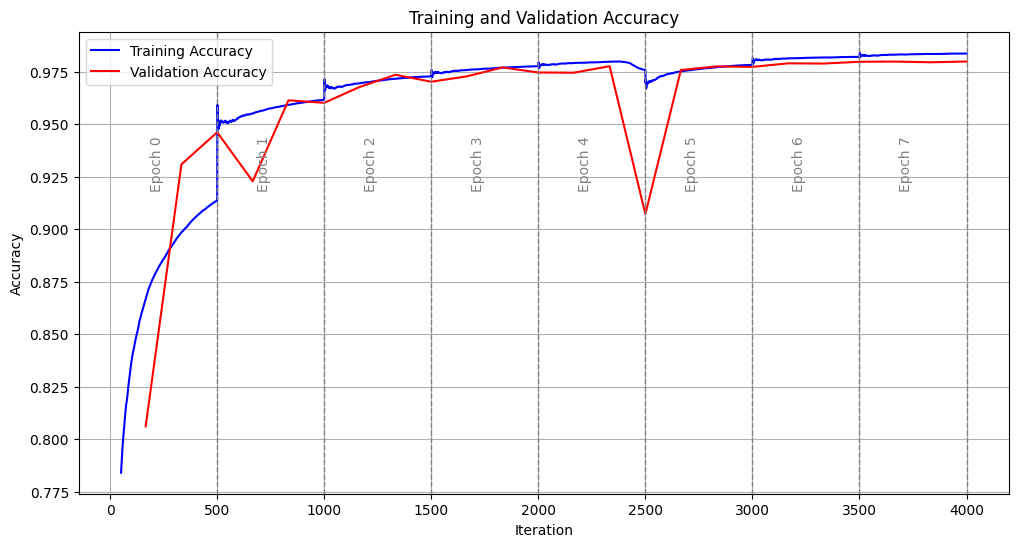

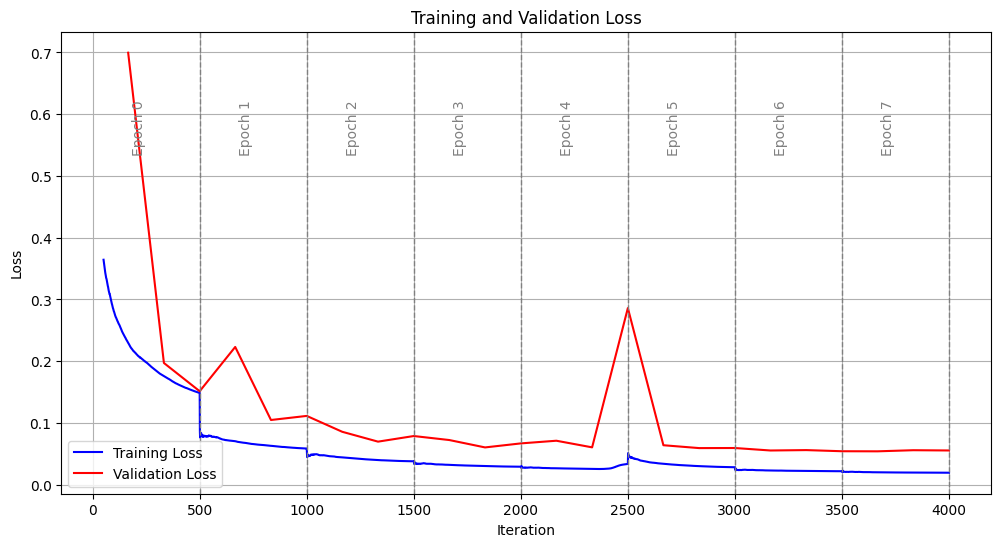

In [3]:
train_segmentation_model_cnns(pthDL)

No .ndpi or .svs files found in the directory.
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: A7274LUNG_ome
 annotation data previously loaded
   
  Starting classification of image 1 of 1: A7274LUNG_ome.tif
Image 1 of 1 took 125 s
  Total time for classification: 0.0h 2.0m 56.83048915863037s


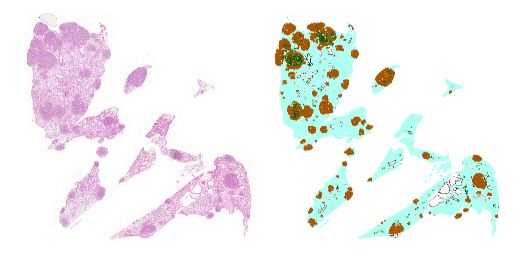


Calculating total number of pixels in the testing dataset...
  There are 149790 pixels of bronchioles, 23% of the most common class.
  There are 411263 pixels of alveoli, 63% of the most common class.
  There are 42225 pixels of vasculature, 6% of the most common class.
  There are 63704 pixels of collagen, 9% of the most common class.
  There are 648977 pixels of whitespace. This is the most common class.
  There are 559256 pixels of metastasis, 86% of the most common class.


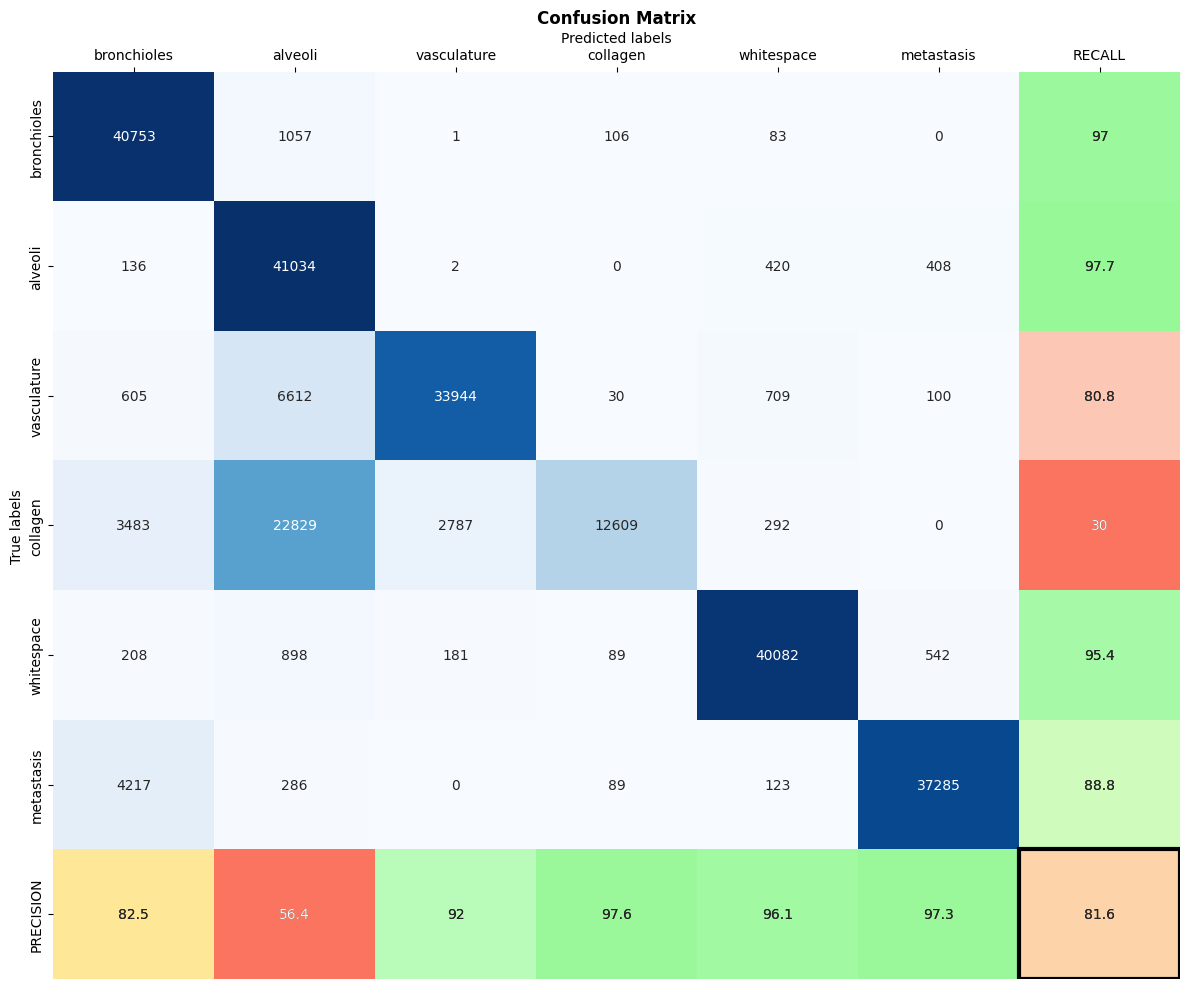


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung yasmin\01_16_2025_valentina\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 81.6%


In [5]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

In [10]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")

In [2]:
import os
import pickle
pthDL = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung yasmin\01_16_2025_valentina'
with open(os.path.join(pthDL,'net.pkl'), 'rb') as f:
    data = pickle.load(f)
    print(data)

{'pthim': '//10.99.68.52/Kiemendata/Valentina Matos/tissues for methods paper/mouse lung yasmin\\10x', 'pthDL': '//10.99.68.52/Kiemendata/Valentina Matos/tissues for methods paper/mouse lung yasmin\\12_09_2024_valentina', 'pthtest': '//10.99.68.52/Kiemendata/Valentina Matos/tissues for methods paper/mouse lung yasmin/testing annotations', 'WS': [[0, 2, 0, 0, 2, 0], [5, 4], [1, 2, 3, 4, 5, 6], [4, 2, 6, 3, 1, 5], []], 'nm': '12_09_2024_valentina', 'umpix': 1, 'cmap': array([[  0,  85,   0],
       [175, 255, 242],
       [170,   0,   0],
       [255, 205, 250],
       [255, 255, 255],
       [170,  85,   0]]), 'sxy': 1024, 'classNames': ['bronchioles', 'alveoli', 'vasculature', 'collagen', 'whitespace', 'metastasis', 'black'], 'ntrain': 15, 'nblack': 7, 'nwhite': 5, 'final_df':     Layer Name          Color Whitespace Settings  Delete layer  \
0  bronchioles    (0, 255, 0)                   0         False   
1      alveoli  (255, 255, 0)                   2         False   
2  vasculat